In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving reviews.csv to reviews.csv
User uploaded file "reviews.csv" with length 204492351 bytes


In [ ]:
import pandas as pd
df = pd.read_csv('reviews.csv')
set(df.label)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)
vec = CountVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(x_train)
clf = LogisticRegression()
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

          -1       0.34      0.67      0.45       554
           0       0.13      0.48      0.20       364
           1       0.99      0.84      0.91     10708

    accuracy                           0.82     11626
   macro avg       0.48      0.66      0.52     11626
weighted avg       0.93      0.82      0.86     11626



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression()
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

          -1       0.44      0.73      0.55       644
           0       0.12      0.49      0.20       352
           1       0.99      0.85      0.91     10630

    accuracy                           0.83     11626
   macro avg       0.52      0.69      0.55     11626
weighted avg       0.93      0.83      0.87     11626



In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
from nltk import tokenize

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
noise = stopwords.words('russian') + list(punctuation)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression()
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

          -1       0.54      0.63      0.58       923
           0       0.26      0.38      0.31       974
           1       0.95      0.89      0.92      9729

    accuracy                           0.83     11626
   macro avg       0.58      0.63      0.60     11626
weighted avg       0.86      0.83      0.84     11626



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from collections import Counter
df.label.value_counts()

 1    36480
 0     5645
-1     4376
Name: label, dtype: int64

In [ ]:
classes = df[(df.label == 1) | (df.label == 0) | (df.label == -1)]

In [ ]:
from sklearn.linear_model import LogisticRegression
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(classes.text)
X_train, X_test, y_train, y_test = train_test_split(bow, classes.label)
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.66      0.55      0.60      1084
           0       0.38      0.28      0.32      1353
           1       0.89      0.94      0.92      9189

    accuracy                           0.83     11626
   macro avg       0.64      0.59      0.61     11626
weighted avg       0.81      0.83      0.82     11626



In [ ]:
max(enumerate(clf.coef_[0]), key=lambda pair: pair[1])

(296008, 1.1656334705125666)

In [ ]:
index_to_word = {
    ind: word
    for (word, ind)
    in vectorizer.vocabulary_.items()
    }

index_to_word[296008]

'скучно'

In [ ]:
top_features = sorted(enumerate(clf.coef_[0]), key=lambda pair: pair[1], reverse=True)[:10]
for index, value in top_features:
  print(index_to_word[index])


скучно
бред
разочарование
единственное
нелепо
скучный
девочек
похоже
остальное
откровенно


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.3, random_state=1)
bow = vec.fit_transform(x_train)
clf = DecisionTreeClassifier()
clf = clf.fit(bow,y_train)
y_pred = clf.predict(vec.transform(x_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7091964733710845


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(bow,y_train)
y_pred = clf.predict(vec.transform(x_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7855350870905311


[Text(167.4, 190.26, 'X[36199] <= 0.5\nentropy = 0.965\nsamples = 32550\nvalue = [3062, 3951, 25537]'),
 Text(83.7, 135.9, 'X[100251] <= 0.5\nentropy = 0.871\nsamples = 25652\nvalue = [1887, 2869, 20896]'),
 Text(41.85, 81.53999999999999, 'X[30850] <= 0.5\nentropy = 0.932\nsamples = 20091\nvalue = [1672, 2447, 15972]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.905\nsamples = 19418\nvalue = [1510, 2303, 15605]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 1.448\nsamples = 673\nvalue = [162, 144, 367]'),
 Text(125.55000000000001, 81.53999999999999, 'X[100552] <= 0.5\nentropy = 0.619\nsamples = 5561\nvalue = [215, 422, 4924]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.582\nsamples = 5213\nvalue = [177, 373, 4663]'),
 Text(146.475, 27.180000000000007, 'entropy = 1.058\nsamples = 348\nvalue = [38, 49, 261]'),
 Text(251.10000000000002, 135.9, 'X[163500] <= 0.5\nentropy = 1.239\nsamples = 6898\nvalue = [1175, 1082, 4641]'),
 Text(209.25, 81.53999999999999, 'X[30850]

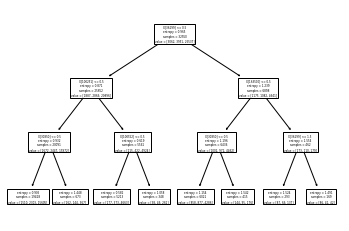

In [ ]:
>>> tree.plot_tree(clf.fit(bow,y_train)) 